# Assignment 6 - Weather
---
Weather is a program that reads the weather data taken in Knock Airport and plots the temperature, the daily mean temperature, and the monthly mean temperature. 

It will also plot data regarding the wind speed, the daily mean wind speed, the daily maximum wind speed and the monthly mean of the daily maximum wind speed.

This notebook can be run in Google Colab in the following link:<a target="_blank" href="https://colab.research.google.com/github/FatimaBOliveira/Programming-for-data-analytics/blob/main/Assignments/assignment_6_Weather.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Loading data
The weather data collected in Knock airport can be found in this [link](https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv). With Python, we can load and analyze this data. First, we can load it with the panda's library and then read it.

In [1]:
# Import Pandas library to load the data.
import pandas as pd

In [2]:
# Load DataFrame.
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23) # The first row starts in line 24, with the indexes.

# Check the first 3 rows.
df.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_14560\1526677498.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", skiprows=23) # The first row starts in line 24, with the indexes.


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


## Check the variables
Before trying to plot variables, I need to check their types, and if there is any invalid or missing data.

In [3]:
# Check variable types.
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb     float64
dewpt    float64
vappr    float64
rhum       int64
msl       object
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun      float64
vis       object
clht      object
clamt     object
dtype: object

In [4]:
#  Use datetime to treat the column "date" as datetime object.
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [5]:
# Check if date is now a datetime object.
df["date"]

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: date, Length: 247674, dtype: datetime64[ns]

Now I will check the [invalid and missing values](https://stackoverflow.com/questions/49677060/pandas-count-empty-strings-in-a-column/77288170#77288170).

In [6]:
# Check if there are any missing values in the data set.
df.isnull().sum()

date     0
ind      0
rain     0
ind.1    0
temp     0
ind.2    0
wetb     0
dewpt    0
vappr    0
rhum     0
msl      0
ind.3    0
wdsp     0
ind.4    0
wddir    0
ww       0
w        0
sun      0
vis      0
clht     0
clamt    0
dtype: int64

In [7]:
# Check if there are any empty values.
df.eq(" ").sum()

date         0
ind          0
rain        49
ind.1        0
temp         0
ind.2        0
wetb         0
dewpt        0
vappr        0
rhum         0
msl         18
ind.3        0
wdsp        50
ind.4        0
wddir       52
ww       55079
w        55080
sun          0
vis      62174
clht        18
clamt       18
dtype: int64

In [8]:
# check if there are "0" values.
df.eq(0).sum()

date          0
ind      199716
rain     158939
ind.1    242490
temp        437
ind.2    240400
wetb        863
dewpt       997
vappr        21
rhum         21
msl           0
ind.3        88
wdsp        128
ind.4        92
wddir       109
ww         6469
w          7716
sun      198183
vis           0
clht      64010
clamt      7732
dtype: int64

## Plot
Now that data is analyzed, it's possible to manipulate it and then create a visual representation.

### Plot temperature
To clean the data, I will create a [new DataFrame with only](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/03_subset_data.html#how-do-i-select-a-subset-of-a-dataframe) the date and the temperature. 

The variable temperature, "temp", has "0" values, and even though it's possible, I noticed that some of them are between higher values, for example, row 135 temperature was 0 but the hour before and after the temperature registered was 13.1. In this case, it was most definitely an error and it will be more accurate to plot if this [data is not considered](https://saturncloud.io/blog/how-to-filter-out-records-with-null-or-empty-strings-in-python-pandas/#using-boolean-indexing).

In [9]:
# Create a new DataFrame.
dftemp=df[["date","temp"]]

# Drop rows with "0" temperature values.
dftemp = dftemp[dftemp["temp"] != 0]

# Check.
dftemp

,date,temp
0,1996-04-10 14:00:00,11.5
1,1996-07-31 08:00:00,11.5
2,1996-07-31 09:00:00,11.6
3,1996-07-31 10:00:00,12.9
4,1996-07-31 11:00:00,14.5
...,...,...
247669,2024-10-31 20:00:00,10.1
247670,2024-10-31 21:00:00,10.1
247671,2024-10-31 22:00:00,10.0
247672,2024-10-31 23:00:00,9.8


For the visualization, Matplotlib and Seaborn are the main plot libraries to use.

To customize the size, [plt.rcParams["figure.figsize"]](https://mljar.com/blog/matplotlib-change-figure-size/) can be used to set the default size for the figures. After that, I create a function with [grid parameters](https://www.geeksforgeeks.org/customizing-minor-ticks-in-matplotlib-turning-on-minor-ticks-only-on-the-y-axis/) that can be used in all of the plots, as this optimizes their readability. Finally, I added a title and used Seaborn to generate the figure.

In [10]:
# Import Matplotlib and Seaborn libraries.
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'Temperature(C) over time'}, xlabel='date', ylabel='temp'>

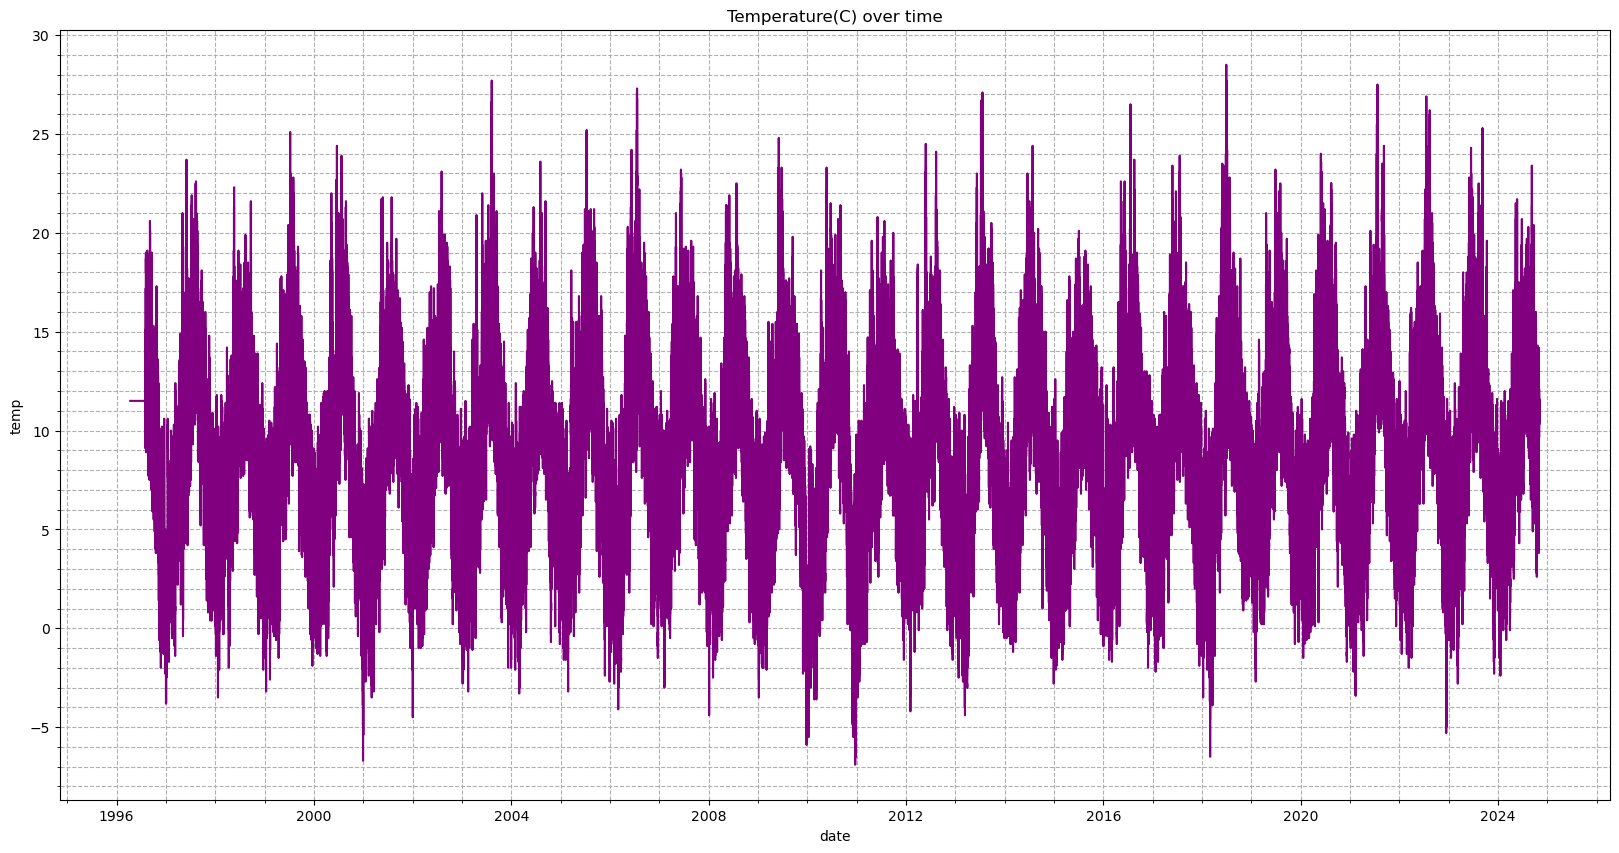

In [11]:
# Set the size of the figure.
plt.rcParams["figure.figsize"] = (20, 10)

# Define the grid parameters to use in the plots.
def grid():
    plt.minorticks_on() # Minor ticks between the main ticks.
    plt.grid(which="both", linestyle="--") # Configure the grid lines.

# Apply the grid() function.
grid()

# Add a title.
plt.title("Temperature(C) over time")

# Plot
sns.lineplot(data=dftemp, x="date", y="temp", color="purple")

#### Daily mean Temperature
For this new plot, I need to select the days from the "date" column, with [dftemp["date"].dt.strftime("%Y-%m-%d")](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.strftime.html), as days are identified by this format, "%Y-%m-%d".

Then [.groupby](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html) will put the data that have the same day together, and then with the [.tranform](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.transform.html), I can use the data for each date to calculate the mean.

After that, I can create a new column with the new data generated.

In [12]:
# Get the days.
days= dftemp["date"].dt.strftime("%Y-%m-%d")

# Calculate the mean temperature for each day.
daily_mean_temp = dftemp.groupby(days)["temp"].transform("mean")

# Create a new column in the original DataFrame.
dftemp["daily_mean_temp"] = daily_mean_temp

# Check.
dftemp.head(3)

,date,temp,daily_mean_temp
0,1996-04-10 14:00:00,11.5,11.50
1,1996-07-31 08:00:00,11.5,12.65
2,1996-07-31 09:00:00,11.6,12.65


<Axes: title={'center': 'Daily mean temperature(C)'}, xlabel='date', ylabel='daily_mean_temp'>

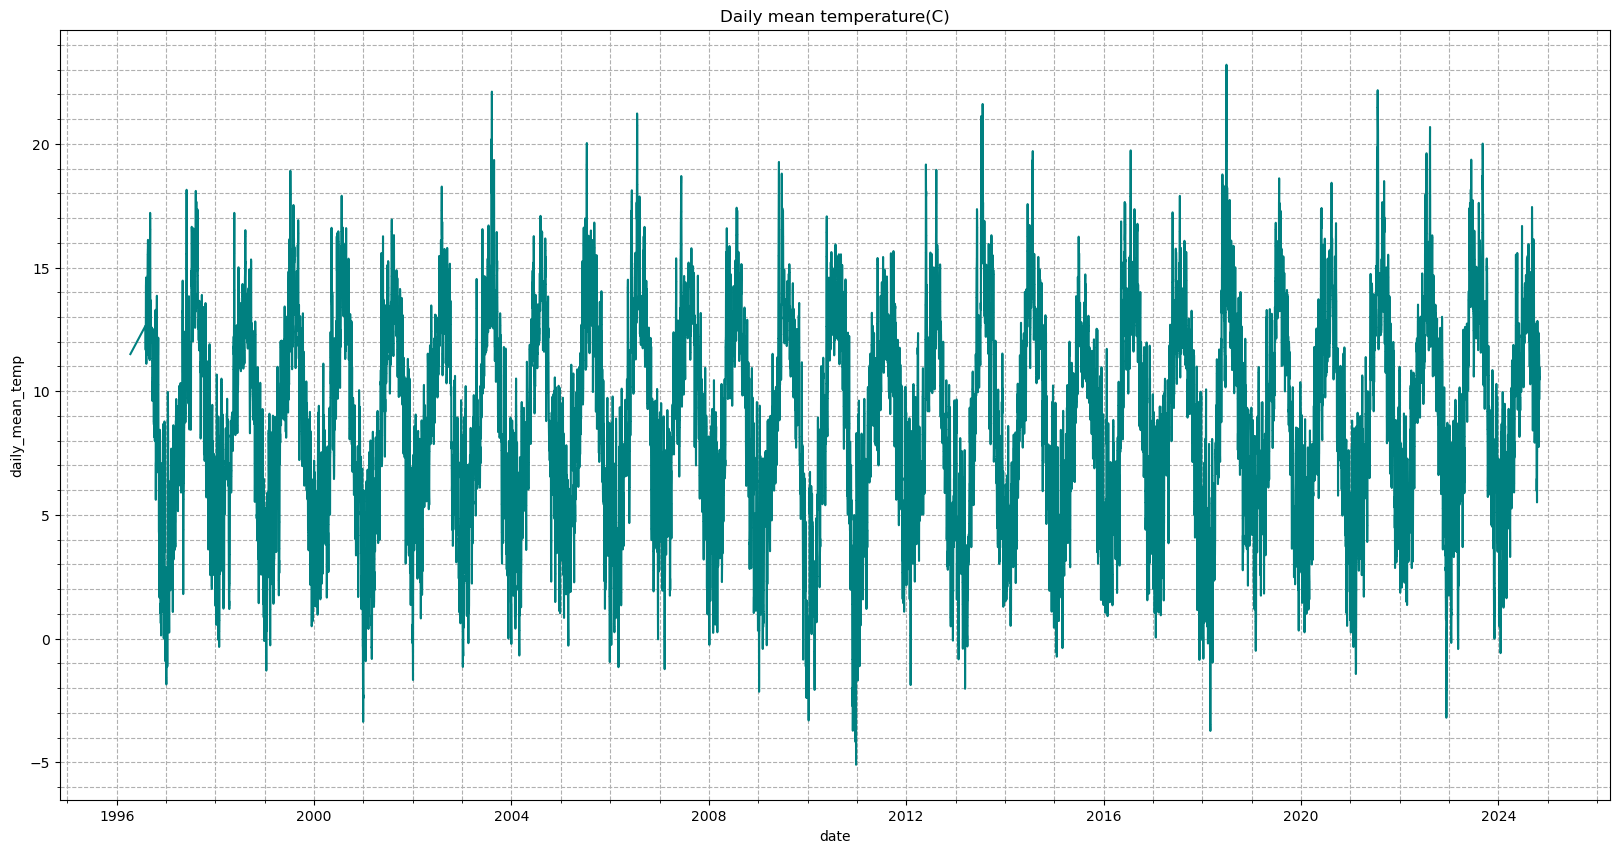

In [13]:
# Plot with the same grid as above.
grid()

# Add title and plot.
plt.title("Daily mean temperature(C)")
sns.lineplot(data=dftemp, x="date", y="daily_mean_temp", color="teal")

#### Monthly mean temperature
The codes used above can be used again to generate this new data.

In [14]:
# Get the months.
months= dftemp["date"].dt.strftime("%Y-%m")

# Calculate the mean temperature for each month.
monthly_mean_temp = dftemp.groupby(months)["temp"].transform("mean")

# Create a new column with the monthly mean temperatures.
dftemp["monthly_mean_temp"] = monthly_mean_temp

# check.
dftemp.head(3)

,date,temp,daily_mean_temp,monthly_mean_temp
0,1996-04-10 14:00:00,11.5,11.50,11.50
1,1996-07-31 08:00:00,11.5,12.65,12.65
2,1996-07-31 09:00:00,11.6,12.65,12.65


<Axes: title={'center': 'Monthly mean temperature(C)'}, xlabel='date', ylabel='monthly_mean_temp'>

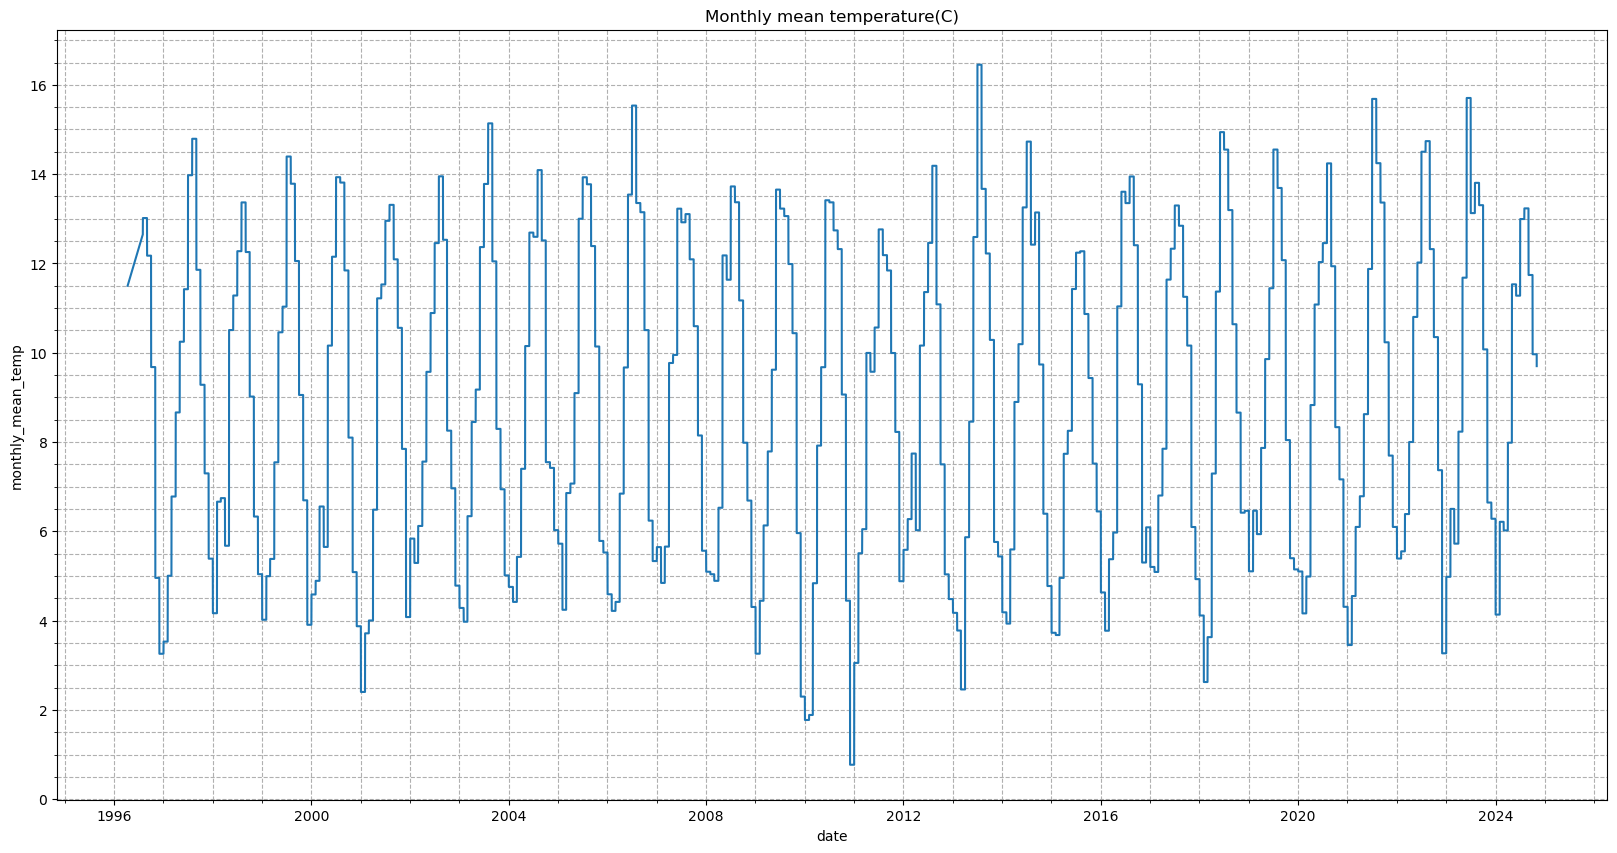

In [15]:
# Apply grid, add title and plot.
grid()
plt.title("Monthly mean temperature(C)")
sns.lineplot(data=dftemp, x="date", y="monthly_mean_temp")

In [16]:
# Check all data generated for the temperature.
dftemp

,date,temp,daily_mean_temp,monthly_mean_temp
0,1996-04-10 14:00:00,11.5,11.500000,11.500000
1,1996-07-31 08:00:00,11.5,12.650000,12.650000
2,1996-07-31 09:00:00,11.6,12.650000,12.650000
3,1996-07-31 10:00:00,12.9,12.650000,12.650000
4,1996-07-31 11:00:00,14.5,12.650000,12.650000
...,...,...,...,...
247669,2024-10-31 20:00:00,10.1,10.554167,9.966263
247670,2024-10-31 21:00:00,10.1,10.554167,9.966263
247671,2024-10-31 22:00:00,10.0,10.554167,9.966263
247672,2024-10-31 23:00:00,9.8,10.554167,9.966263


### Wind speed
Regarding the wind speed, I will create a new DataFrame with only the date and windspeed, "wdsp". Then, I will drop all the rows that contain empty values.

In [17]:
# New data frame with date and wind speed.
dfws=df[["date","wdsp"]]

# Drop the empty values.
dfws = dfws[dfws["wdsp"] != " "]

# Check.
dfws

,date,wdsp
0,1996-04-10 14:00:00,0
1,1996-07-31 08:00:00,0
2,1996-07-31 09:00:00,0
3,1996-07-31 10:00:00,0
4,1996-07-31 11:00:00,0
...,...,...
247669,2024-10-31 20:00:00,5
247670,2024-10-31 21:00:00,5
247671,2024-10-31 22:00:00,4
247672,2024-10-31 23:00:00,6


While checking the data types at the beginning of this notebook, it showed that "wdsp" is an object, so it needs to be [converted into numeric type](https://stackoverflow.com/questions/64890665/how-do-i-fix-this-type-error-value-must-be-an-instance-of-str-or-bytes-not-a#comment114730210_64890983), otherwise it will give an error when trying to plot. After that, the "0" values can be successfully removed from this data.

In [18]:
# Change the "wdsp" type from object to int.
dfws["wdsp"] = pd.to_numeric(dfws["wdsp"], errors="coerce")

# Drop the "0" values
dfws = dfws[dfws["wdsp"] != 0]

# Check.
dfws

,date,wdsp
18,1996-08-01 01:00:00,6
19,1996-08-01 02:00:00,8
20,1996-08-01 03:00:00,9
21,1996-08-01 04:00:00,8
22,1996-08-01 05:00:00,8
...,...,...
247669,2024-10-31 20:00:00,5
247670,2024-10-31 21:00:00,5
247671,2024-10-31 22:00:00,4
247672,2024-10-31 23:00:00,6


<Axes: title={'center': 'Wind speed over time'}, xlabel='date', ylabel='wdsp'>

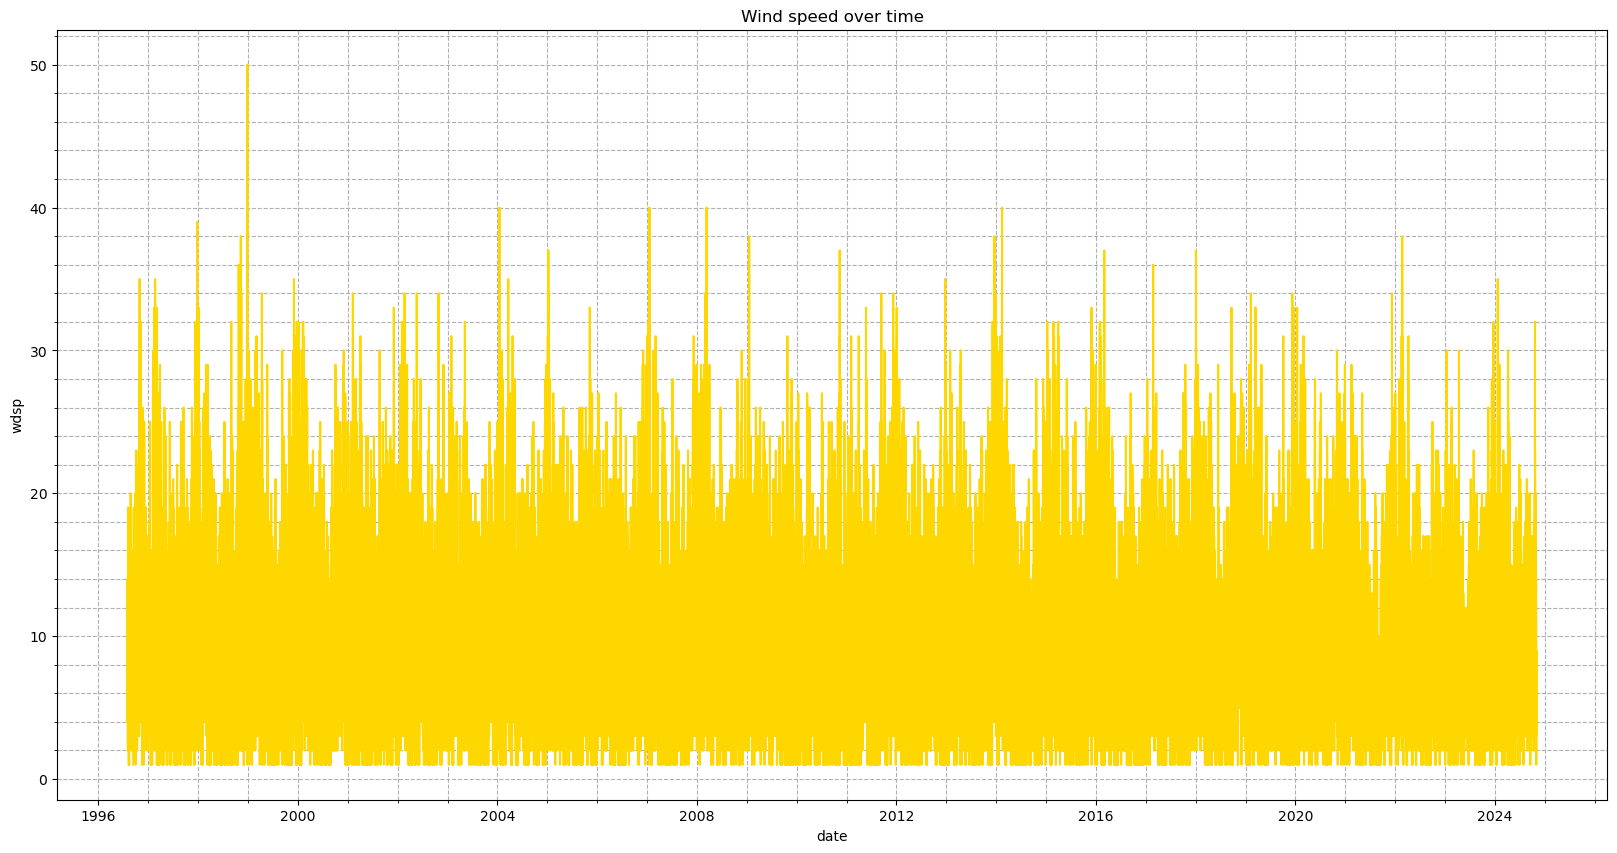

In [19]:
# Add grid, title and plot.
grid()
plt.title("Wind speed over time")
sns.lineplot(data=dfws, x="date", y="wdsp", color="gold")

#### Daily rolling wind speed
In this new plot, I can use the same code as previously used in the temperature.

In [20]:
# Calculate the daily wind speed mean.
daily_mean_wind = dfws.groupby(days)["wdsp"].transform("mean")

# Create a new column.
dfws["daily_mean_wind"] = daily_mean_wind

# Check
dfws.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_14560\3023844052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfws["daily_mean_wind"] = daily_mean_wind


,date,wdsp,daily_mean_wind
18,1996-08-01 01:00:00,6,10.409091
19,1996-08-01 02:00:00,8,10.409091
20,1996-08-01 03:00:00,9,10.409091


<Axes: title={'center': 'Daily mean wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

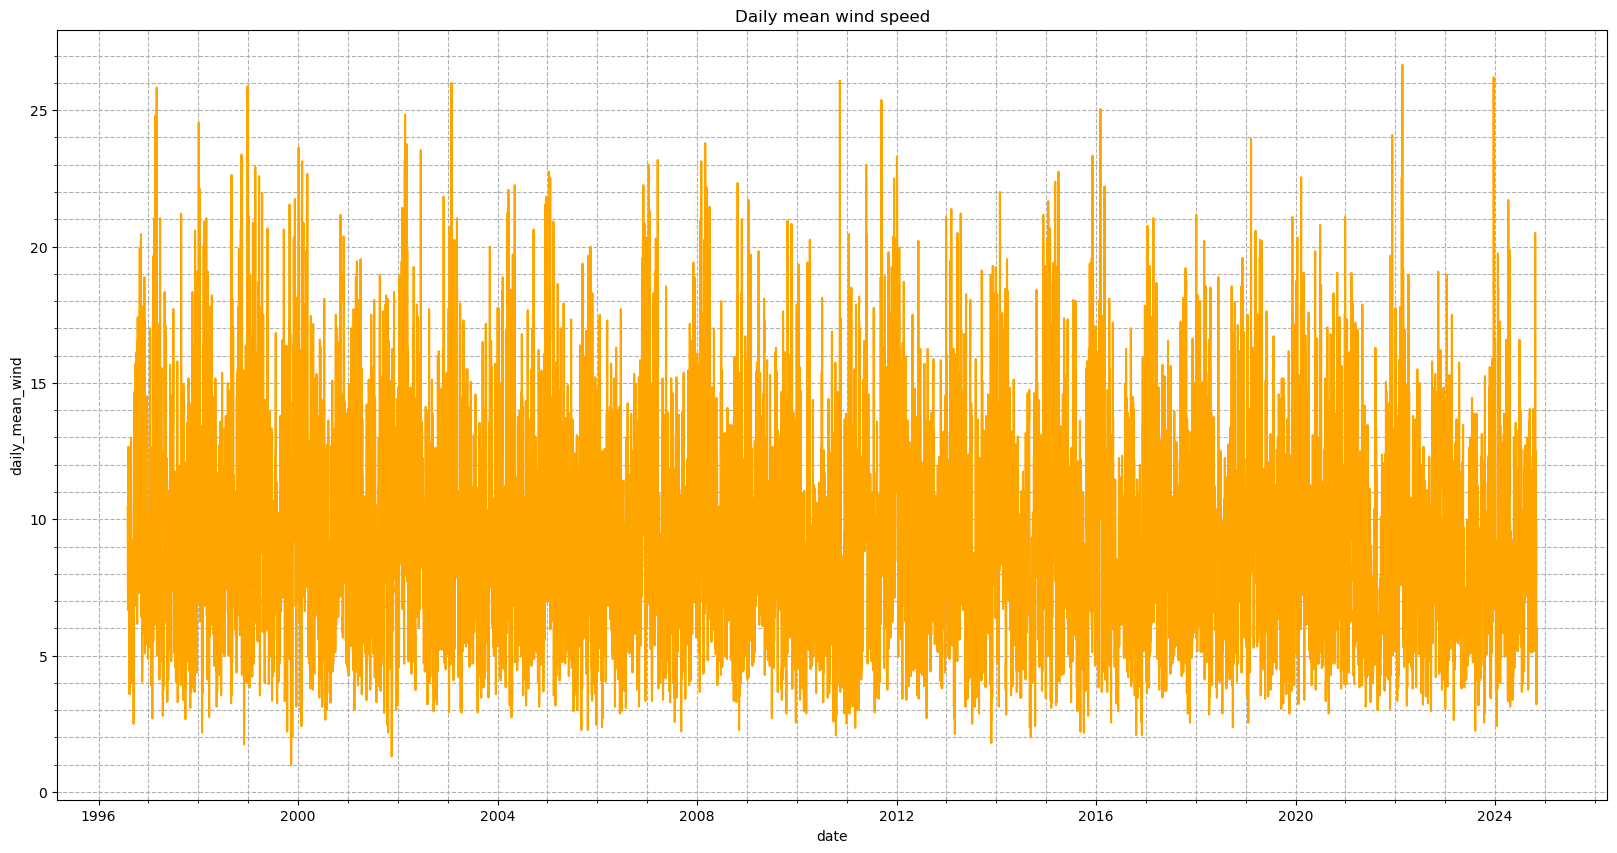

In [21]:
# Apply grid, title and plot.
grid()
plt.title("Daily mean wind speed")
sns.lineplot(data=dfws, x="date", y="daily_mean_wind", color="orange")

#### Daily maximum wind speed
To calculate the maximum, can use the argument "max" instead of the "mean" inside [.transform()](https://pandas.pydata.org/docs/user_guide/groupby.html#the-transform-method).

In [22]:
# Calculate the daily maximum wind speed.
daily_max_wind = dfws.groupby(days)["wdsp"].transform("max")

# Create a new column and show.
dfws["daily_max_wind"] = daily_max_wind
dfws.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_14560\359797845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfws["daily_max_wind"] = daily_max_wind


,date,wdsp,daily_mean_wind,daily_max_wind
18,1996-08-01 01:00:00,6,10.409091,14.0
19,1996-08-01 02:00:00,8,10.409091,14.0
20,1996-08-01 03:00:00,9,10.409091,14.0


<Axes: title={'center': 'Daily maximum wind speed'}, xlabel='date', ylabel='daily_max_wind'>

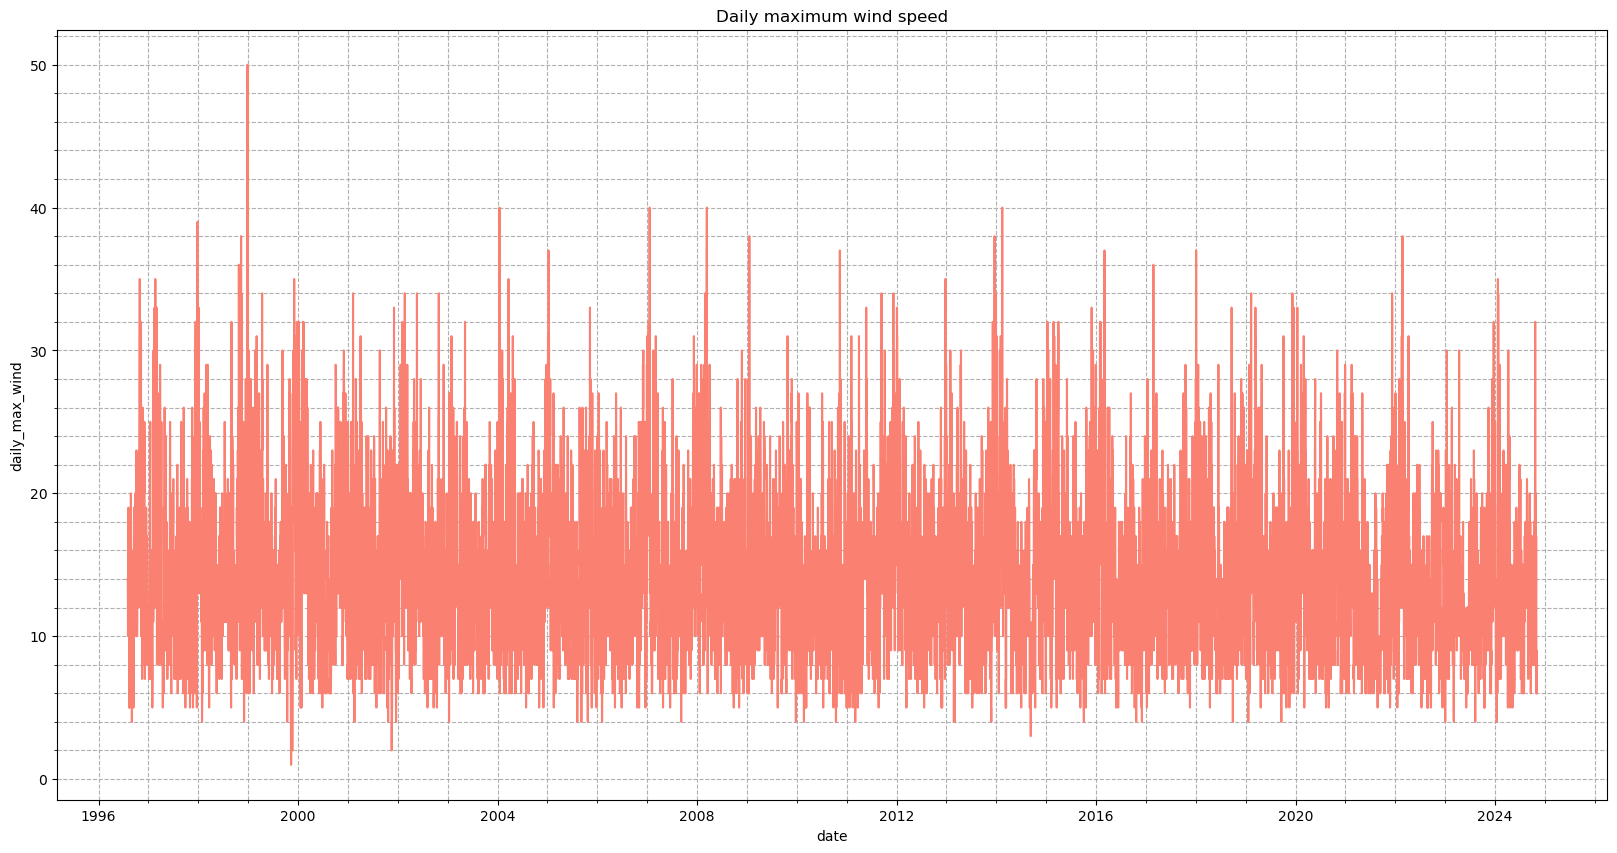

In [23]:
# Apply grid, add title and plot.
grid()
plt.title("Daily maximum wind speed")
sns.lineplot(data=dfws, x="date", y="daily_max_wind", color="salmon")

#### Monthly mean of the daily maximum wind speed
The same method was applied.

In [24]:
# Calculate the monthly mean of the daily maximum wind speed.
monthly_mean_daily_max_wind = dfws.groupby(months)["daily_max_wind"].transform("mean")

# Create a new column.
dfws["monthly_mean_daily_max_wind"] = monthly_mean_daily_max_wind

# Check.
dfws.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_14560\3682508928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfws["monthly_mean_daily_max_wind"] = monthly_mean_daily_max_wind


,date,wdsp,daily_mean_wind,daily_max_wind,monthly_mean_daily_max_wind
18,1996-08-01 01:00:00,6,10.409091,14.0,12.50882
19,1996-08-01 02:00:00,8,10.409091,14.0,12.50882
20,1996-08-01 03:00:00,9,10.409091,14.0,12.50882


<Axes: title={'center': 'Monthly mean of the daily maximum wind speed'}, xlabel='date', ylabel='monthly_mean_daily_max_wind'>

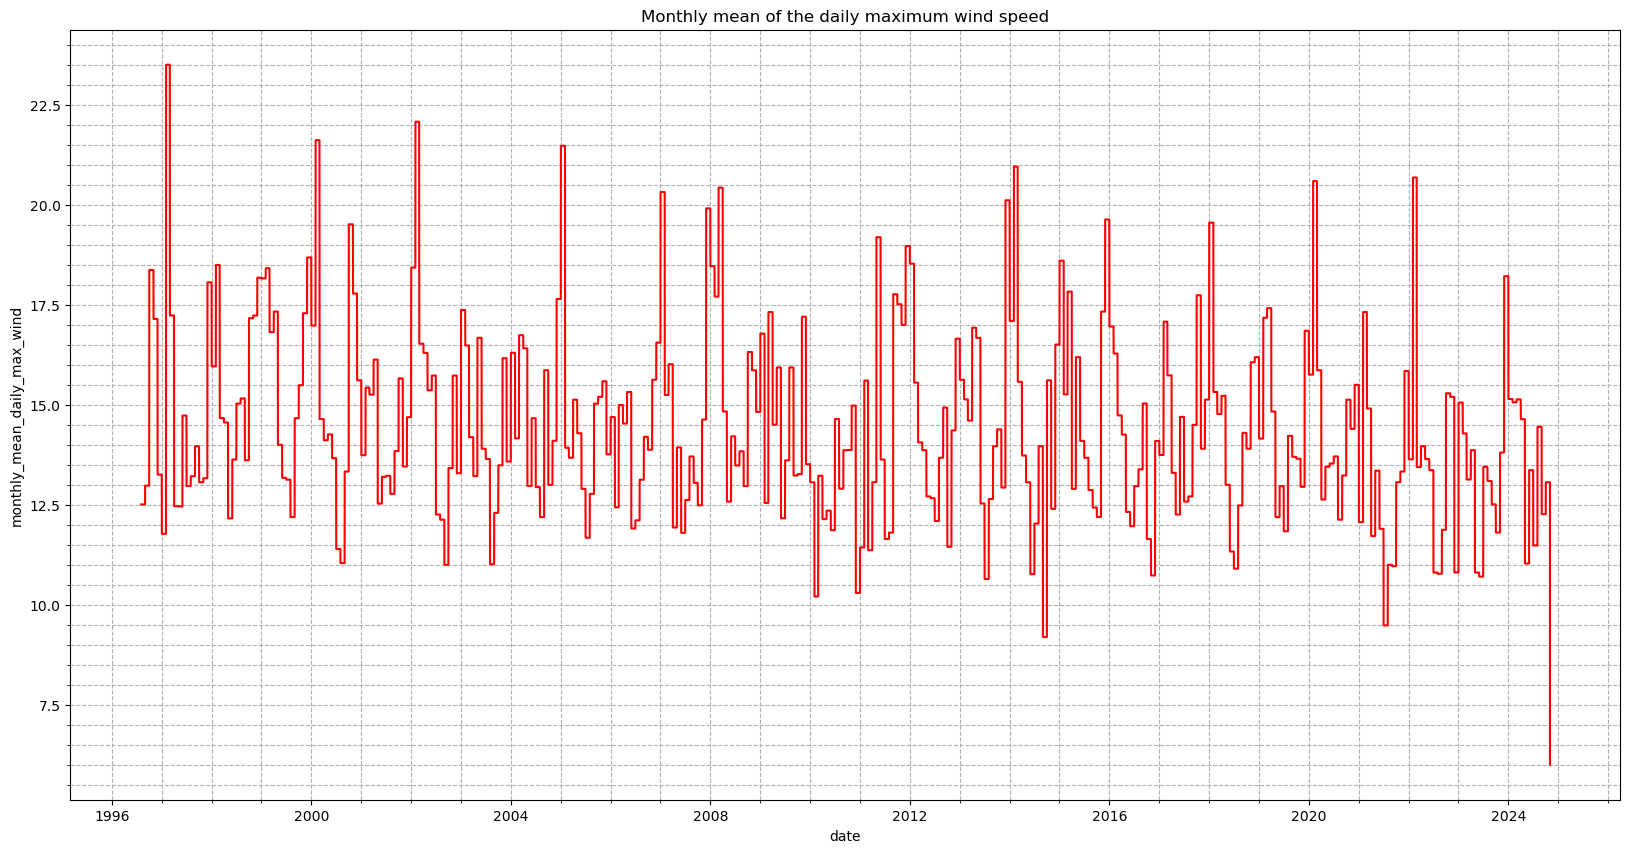

In [25]:
# Apply grid, add title and plot.
grid()
plt.title("Monthly mean of the daily maximum wind speed")
sns.lineplot(data=dfws, x="date", y="monthly_mean_daily_max_wind", color="red")

In [26]:
# Analyse all the new data generated for wind speed.
dfws

,date,wdsp,daily_mean_wind,daily_max_wind,monthly_mean_daily_max_wind
18,1996-08-01 01:00:00,6,10.409091,14.0,12.508820
19,1996-08-01 02:00:00,8,10.409091,14.0,12.508820
20,1996-08-01 03:00:00,9,10.409091,14.0,12.508820
21,1996-08-01 04:00:00,8,10.409091,14.0,12.508820
22,1996-08-01 05:00:00,8,10.409091,14.0,12.508820
...,...,...,...,...,...
247669,2024-10-31 20:00:00,5,5.500000,9.0,13.064516
247670,2024-10-31 21:00:00,5,5.500000,9.0,13.064516
247671,2024-10-31 22:00:00,4,5.500000,9.0,13.064516
247672,2024-10-31 23:00:00,6,5.500000,9.0,13.064516


_____________
## End